*Author: Priya Chaurasiya*

**GRIP - The Sparks Foundation**

Data Science and Business Analytics Internship

Task-5: Exploratory Data Analysis - Sports 

In this task we've to find out the most successful teams, players and factors contributing win or loss of a team.

Importing the Dependencies:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the data into Pandas dataframe:

In [2]:
data_m = pd.read_csv('/content/drive/MyDrive/matches.csv')

**Data Preprocessing and Analysis:**

In [3]:
#printing the first five rows of the dataset:
data_m.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#printing the last five rows of the dataset:
data_m.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


**Data-- deliveries.csv**

In [5]:
data_d = pd.read_csv('/content/drive/MyDrive/deliveries.csv')

In [6]:
data_d.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
data_d.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [8]:
data_d.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [9]:
season_data = data_m[['id','season','winner']]
complete_data = data_d.merge(season_data, how = 'inner', left_on = 'match_id', right_on = 'id')

In [10]:
complete_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [11]:
data_m.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [12]:
data_m = data_m.drop(['umpire3'],axis=1)
data_m.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [13]:
wins_per_season = data_m.groupby("season")["winner"].value_counts()

In [14]:
print(wins_per_season)

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64


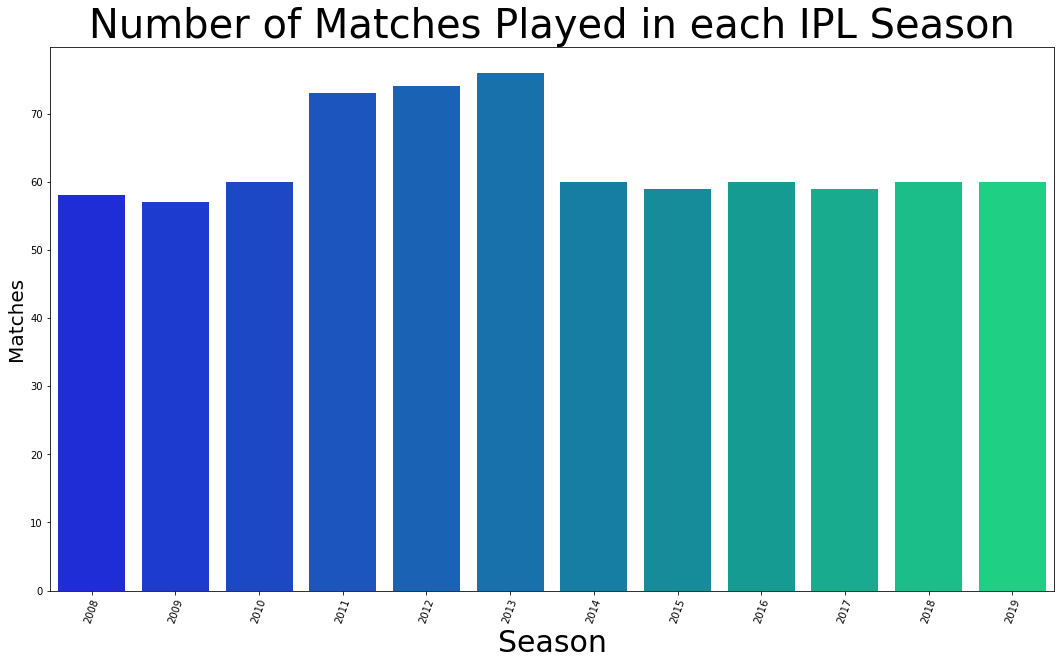

In [15]:
plt.figure(figsize=(18,10))
sns.countplot('season', data = data_m, palette = 'winter')
plt.title("Number of Matches Played in each IPL Season", fontsize=40)
plt.xticks(rotation=70)
plt.xlabel("Season", fontsize=30)
plt.ylabel("Matches", fontsize=20)
plt.show()

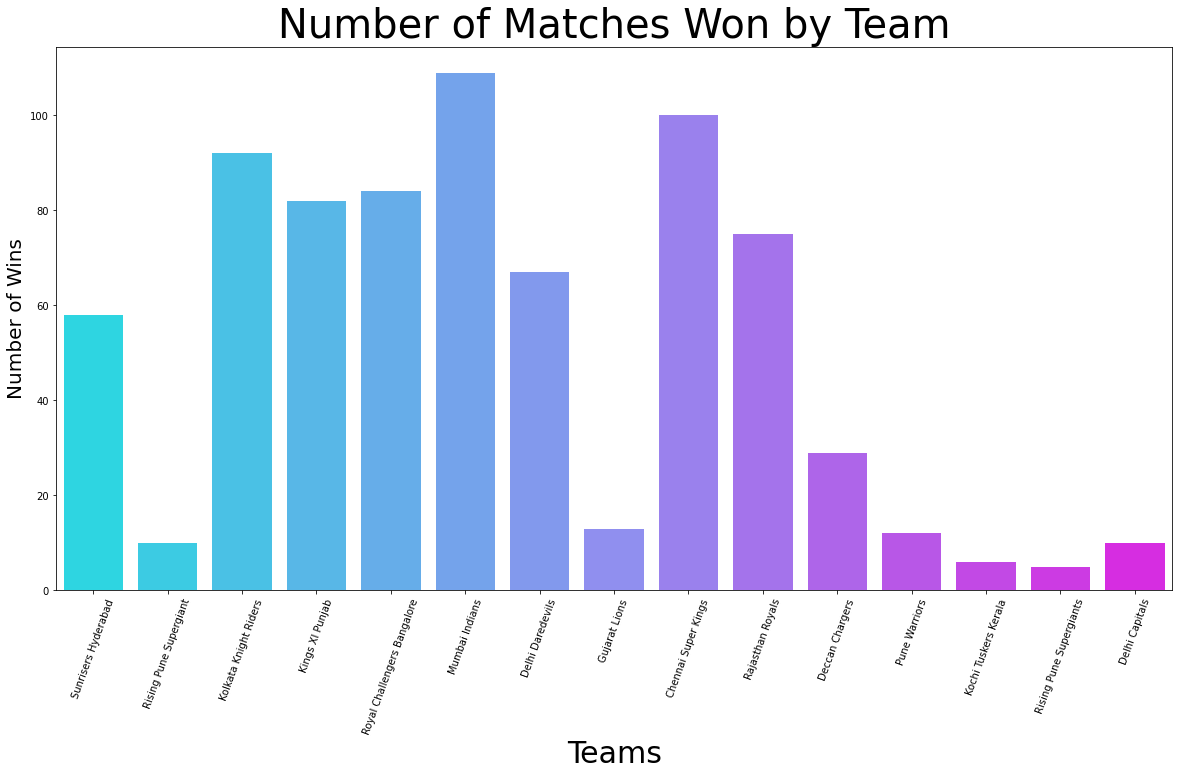

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x='winner', data=data_m, palette='cool')
plt.title("Number of Matches Won by Team", fontsize=40)
plt.xticks(rotation=70)
plt.xlabel("Teams", fontsize=30)
plt.ylabel("Number of Wins", fontsize=20)
plt.show()

In [17]:
data_m['win_by'] = np.where(data_m['win_by_runs']>0, 'Bat First', 'Bowl First')

In [18]:
data_m.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,win_by
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Bat First
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Bowl First
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Bowl First
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Bowl First
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,Bat First


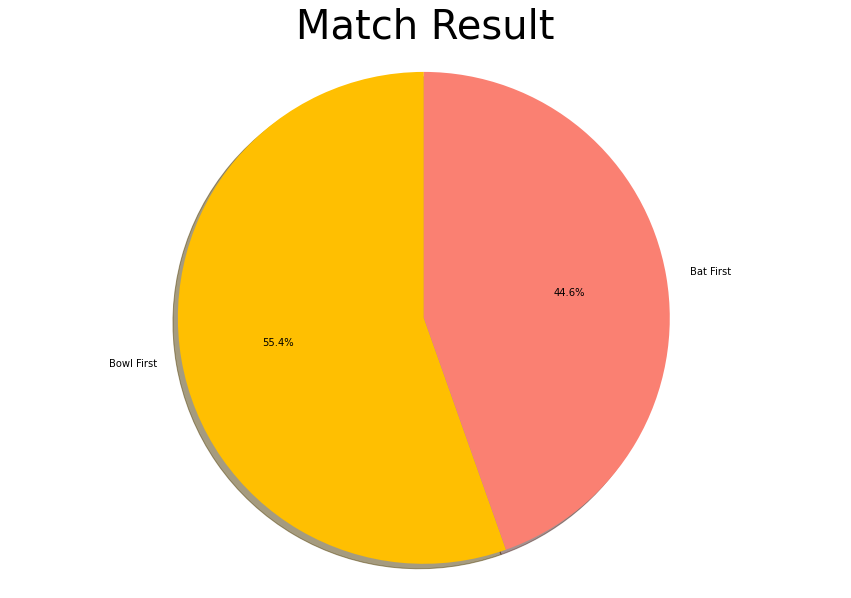

In [19]:
Win = data_m.win_by.value_counts()
labels = np.array(Win.index)
sizes = Win.values
colors = ['#FFBF01', '#FA8072']
plt.figure(figsize=(15,10))
plt.pie(sizes, labels=labels, colors=colors,
       autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Match Result", fontsize=40)
plt.axis('equal')
plt.show()

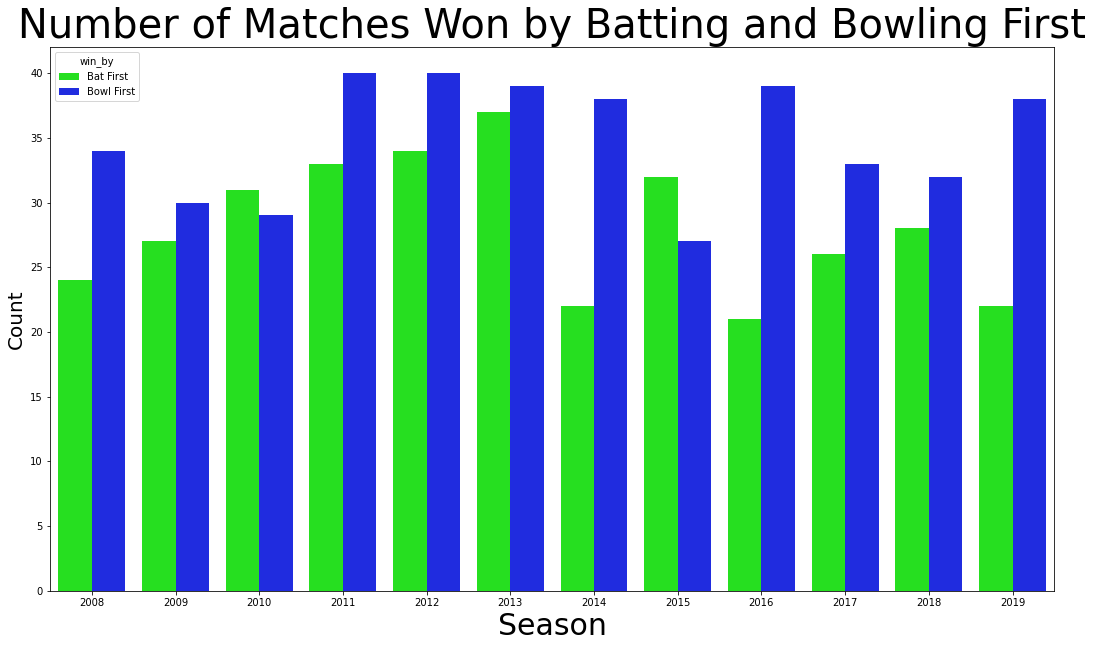

In [20]:
plt.figure(figsize=(18,10))
sns.countplot('season', hue='win_by', data=data_m, palette='hsv')
plt.title("Number of Matches Won by Batting and Bowling First", fontsize=40)
plt.xlabel("Season", fontsize=30)
plt.ylabel("Count", fontsize=20)
plt.show()

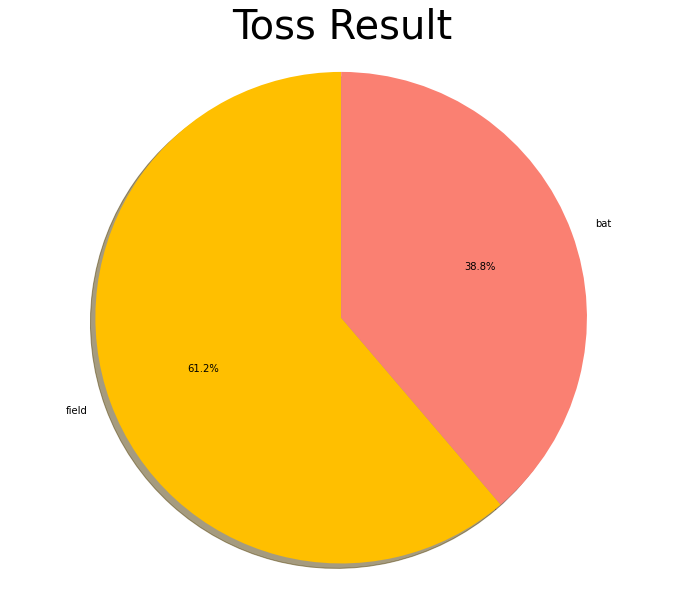

In [21]:
#we will plot pie chart on Toss Decision:
Toss = data_m.toss_decision.value_counts()
labels = np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize=(12,10))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss Result", fontsize=40)
plt.axis("equal")
plt.show()

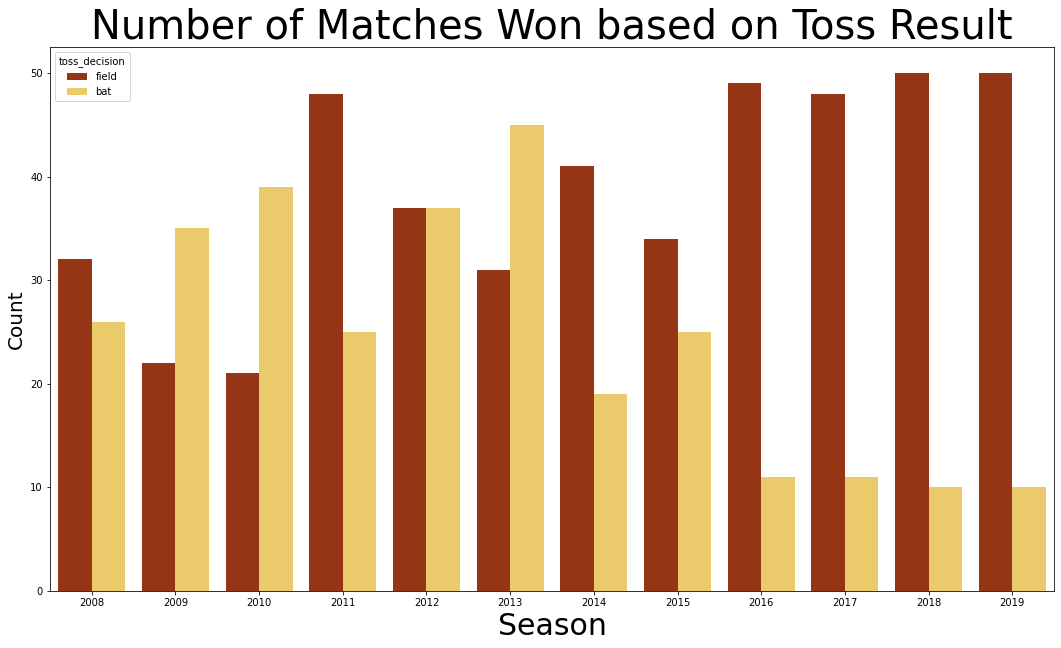

In [22]:
#we will plot a graph on number of matches won based on Toss Result:
plt.figure(figsize=(18,10))
sns.countplot('season', hue='toss_decision', data=data_m, palette='afmhot')
plt.title("Number of Matches Won based on Toss Result", fontsize=40)
plt.xlabel("Season", fontsize=30)
plt.ylabel("Count", fontsize=20)
plt.show()

In [23]:
#we will print the Winner of the IPL season-wise:
final_matches = data_m.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


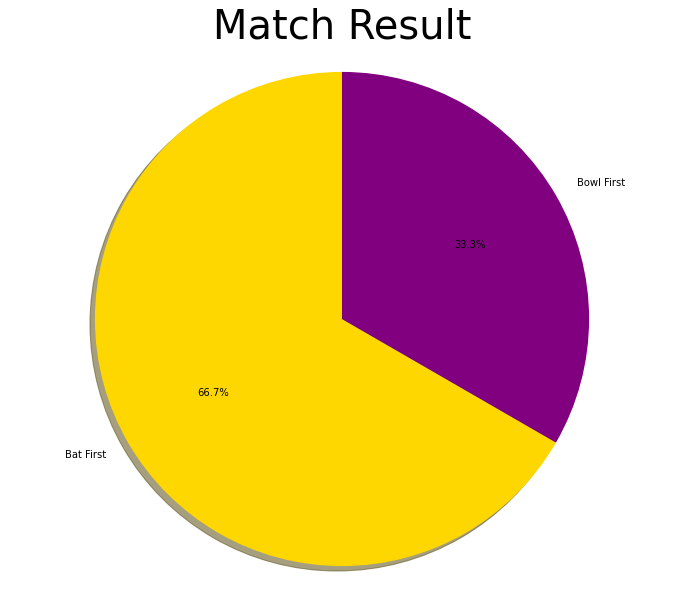

In [24]:
#we will plot pie chart on Winning percentage in Final:
match = final_matches.win_by.value_counts()
labels = np.array(match.index)
sizes = match.values
colors = ['gold', 'purple']
plt.figure(figsize=(12,10))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Match Result", fontsize=40)
plt.axis("equal")
plt.show()

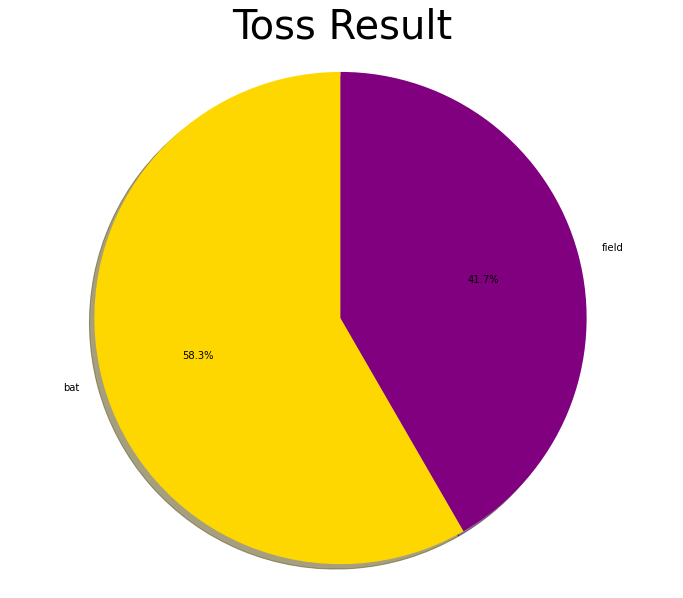

In [25]:
#we will plot pie chart on Winning percentage in Final:
Toss = final_matches.toss_decision.value_counts()
labels = np.array(Toss.index)
sizes = Toss.values
colors = ['gold', 'purple']
plt.figure(figsize=(12,10))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss Result", fontsize=40)
plt.axis("equal")
plt.show()


<Figure size 1440x720 with 0 Axes>

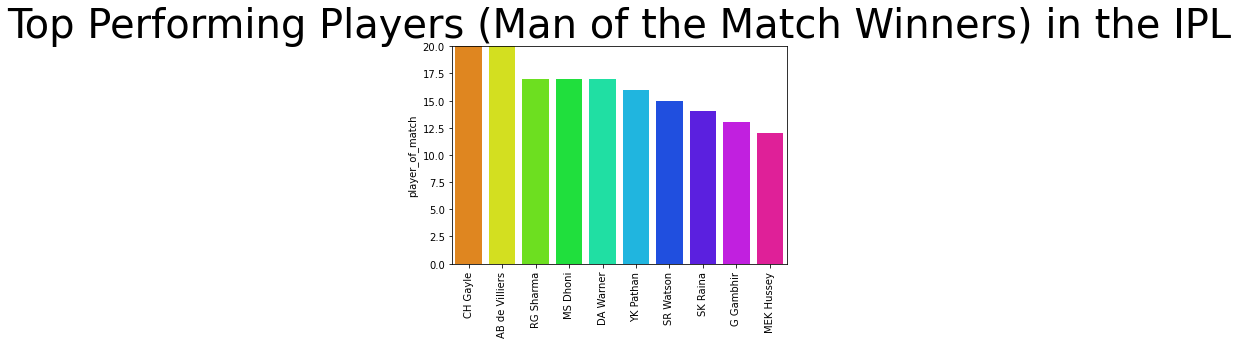

In [26]:
#we will print the name of the top performing players in the IPL:
plt.figure(figsize=(20,10))
top_players = data_m.player_of_match.value_counts()[:10]
fig,ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top Performing Players (Man of the Match Winners) in the IPL", fontsize=40)
top_players.plot.bar()
sns.barplot(x= top_players.index, y=top_players, orient='v', palette='hsv')
plt.show()

In [27]:
#we will print IPL Finals venues and Winners along with the Number of wins:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [28]:
#we will print Number of Seasons Won by teams.
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [29]:
#we will print Toss Winner, Toss Decision, Winner in Final Matches:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [30]:
#we will print the Man of the Match in the Final:
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [31]:
#we wll see the number of times the Team who Wins the Toss Wins the Match Statistics:
len(final_matches[final_matches['toss_winner'] == final_matches['winner']]['winner'])

9

In [32]:
#we will print Number of 4 hit by teams:
four_data = complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


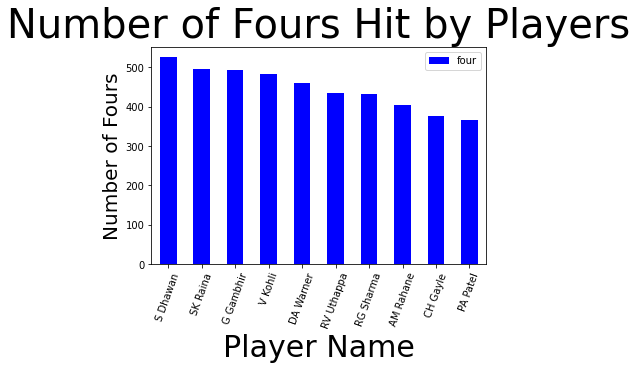

In [33]:
#we will plot graph on fours hit by Players:
batsman_four = four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax = batsman_four.iloc[:10,:].plot('batsman',kind='bar',color='blue')
plt.title("Number of Fours Hit by Players", fontsize=40)
plt.xticks(rotation=70)
plt.xlabel("Player Name",fontsize=30)
plt.ylabel("Number of Fours",fontsize=20)
plt.show()

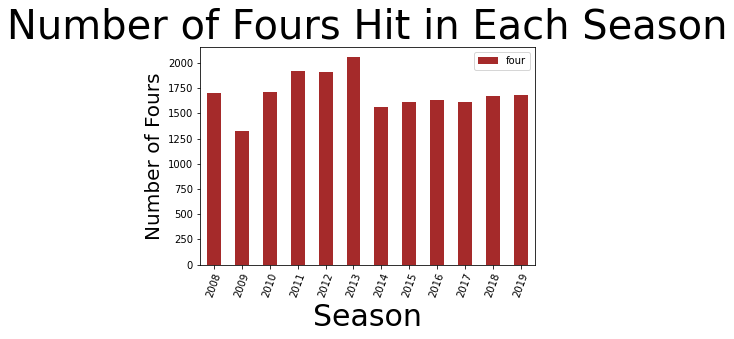

In [34]:
#we will plot graph on number of fours hit in each season:
ax = four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color='brown')
plt.title("Number of Fours Hit in Each Season", fontsize=40)
plt.xticks(rotation=70)
plt.xlabel("Season", fontsize=30)
plt.ylabel("Number of Fours", fontsize=20)
plt.show()

In [35]:
#we will print number of sixes hit by teams:
six_data = complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


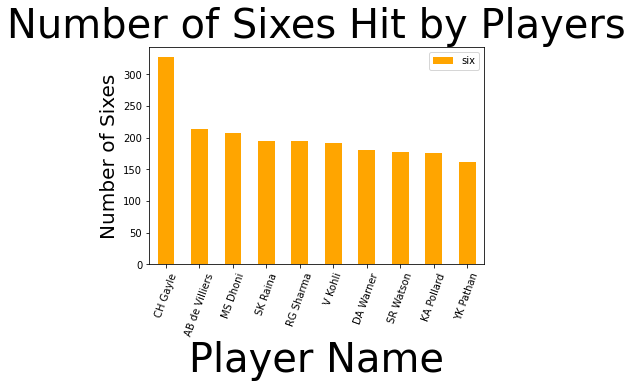

In [36]:
#we will plot graph on Six hit by Players:
batsman_six = six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax = batsman_six.iloc[:10,:].plot('batsman',kind='bar',color='orange')
plt.title("Number of Sixes Hit by Players", fontsize=40)
plt.xticks(rotation=70)
plt.xlabel("Player Name",fontsize=40)
plt.ylabel("Number of Sixes",fontsize=20)
plt.show()

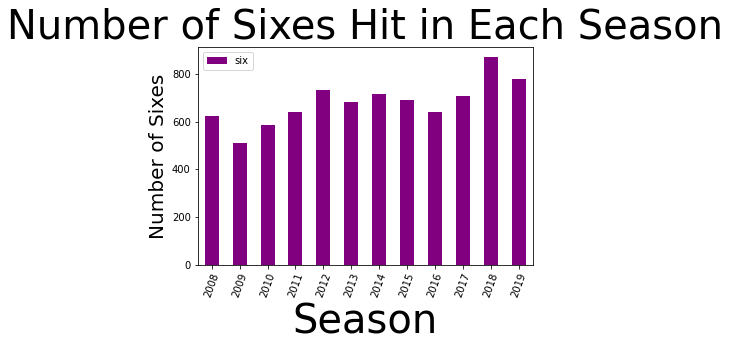

In [37]:
#we will plot graph on number of Sixes hit in each season:
ax = six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color='purple')
plt.title("Number of Sixes Hit in Each Season", fontsize=40)
plt.xticks(rotation=70)
plt.xlabel("Season", fontsize=40)
plt.ylabel("Number of Sixes", fontsize=20)
plt.show()

In [38]:
#we will print the Top 10 Leading Run Scorers in the IPL:
batsman_score = data_d.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score = batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** TOP 10 LEADING RUN SCORERS IN IPL ARE ***")
batsman_score.iloc[:10,:]

*** TOP 10 LEADING RUN SCORERS IN IPL ARE ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [39]:
#we will print number of matches played by Batsman:
No_Matches_player = data_d[['match_id','player_dismissed']]
No_Matches_player = No_Matches_player.groupby('player_dismissed')['match_id'].count().reset_index().sort_values(
                                                 by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns = ['batsman','No_of_Matches']
No_Matches_player.head()

,batsman,No_of_Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


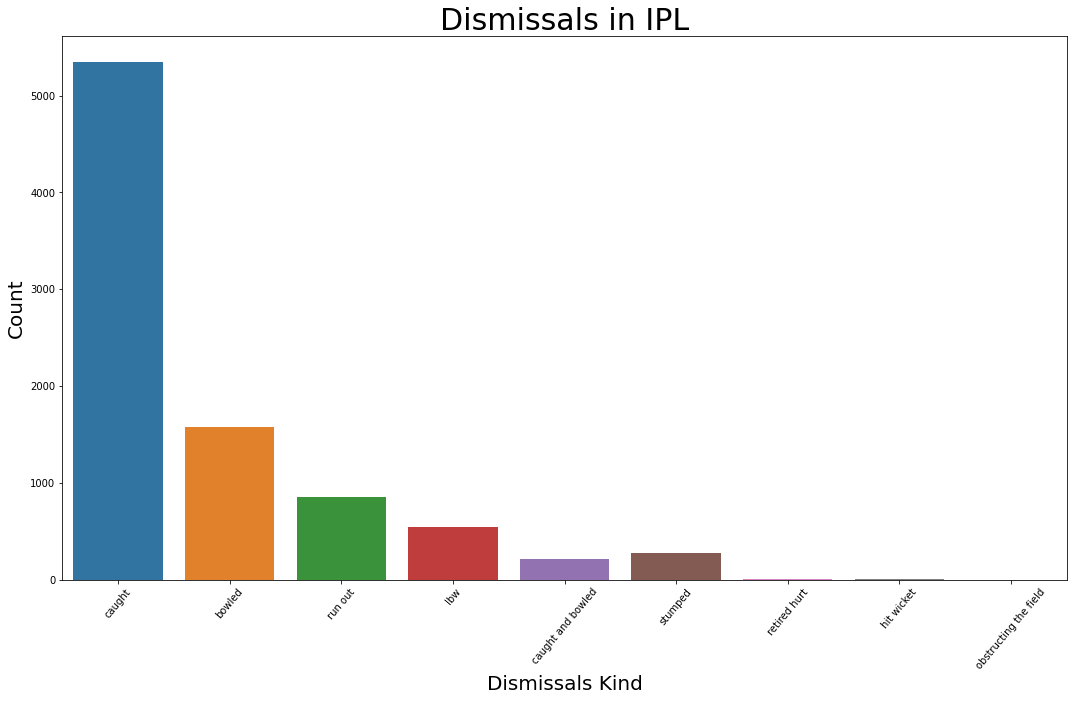

In [40]:
#Dismissals in IPL:
plt.figure(figsize=(18,10))
ax = sns.countplot(data_d.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=30)
plt.xlabel("Dismissals Kind",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=50)
plt.show()

In [41]:
wicket_data = data_d.dropna(subset=['dismissal_kind'])
wicket_data = wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [42]:
print("Number of Wickets fallen are: ",wicket_data.shape[0])

Number of Wickets fallen are:  7968


In [43]:
#we will print the IPL's most Wicket taking Bowler:
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True)

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
...,...,...
343,BMAJ Mendis,1
344,TP Sudhindra,1
345,LA Carseldine,1
346,S Vidyut,1


Conclusion:

--> The highest number of Matches Played in an IPL Season was in year : 2011, 2012, 2013

--> The highest number of Matches were Won by : Mumbai Indians

--> Teams which Bowl First have a Higher Chance of Winning the Match than the Team which Bat First.

--> After Winning the Toss Majority of teams like to Bowl First.

--> In the IPL Finals Teams Which Win the Toss and Choose to Bowl First Win More Matches than the Team which Bat First.

--> In Finals Teams tend to Bowl First After Winning the Toss.

--> Top MoM Winners are : CH Gayle, AB de Villiers.

--> It is also Interesting that in the IPL Finals 9 out 12 times Team Winning the Toss has Won the Final.

--> The Highest Number of Fours were hit by : S Dhawan

--> The Highest Number of Sixes were hit by : CH Gayle

--> Top Leading Run Scorers in IPL are : Virat Kohli, Suresh Raina, Rohit Sharma

--> Dismissals in IPL were maximum by : Catch outs

--> IPL's Most Wicket taking Bowler is : SL Malinga

So for a Company to Endorse for it's Products:

--> The Best Teams are : Mumbai Indians, Chennai Super Kings, Royal Challengers Bangalore.

--> The Best Players are : Virat Kohli, CH Gayle, AB de villiers, Rohit Sharma, MS Dhoni